## SUV Predictions

In [23]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline
import seaborn as sns

In [7]:
SUV_data = pd.read_csv("suv_data.csv")
SUV_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:ylabel='Frequency'>

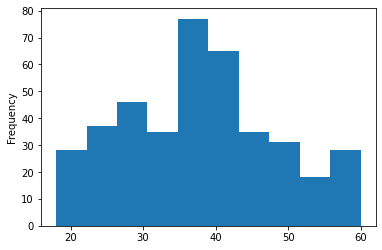

In [27]:
SUV_data["Age"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

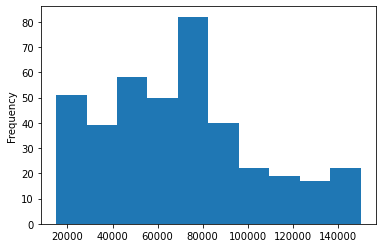

In [28]:
SUV_data["EstimatedSalary"].plot.hist()

In [19]:
SUV_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [20]:
SUV_data.shape

(400, 5)

In [21]:
SUV_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [22]:
SUV_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Purchased', ylabel='count'>

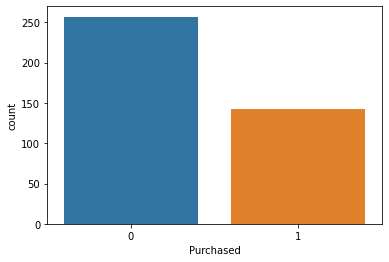

In [24]:
sns.countplot(x="Purchased", data=SUV_data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

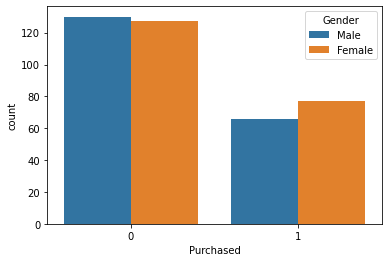

In [26]:
sns.countplot(x="Purchased", hue="Gender", data=SUV_data)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

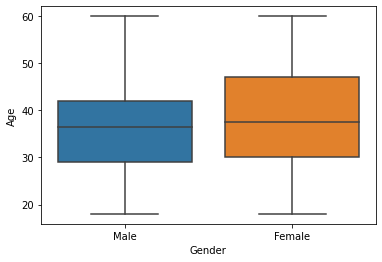

In [32]:
sns.boxplot(x="Gender",y="Age",data=SUV_data)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

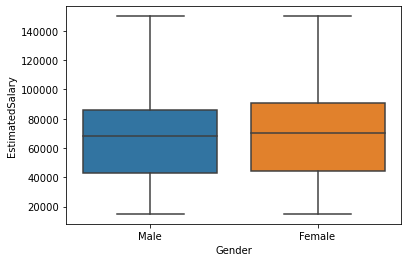

In [33]:
sns.boxplot(x="Gender",y="EstimatedSalary",data=SUV_data)

In [36]:
gender = pd.get_dummies(SUV_data["Gender"], drop_first=True)
gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [37]:
SUV_data = pd.concat([SUV_data,gender],axis=1)
SUV_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


In [38]:
SUV_data.drop(["Gender"],axis=1,inplace=True)
SUV_data.head()

,User ID,Age,EstimatedSalary,Purchased,Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [41]:
X = SUV_data.iloc[:,[1,2,4]].values
y = SUV_data.iloc[:,3]

In [42]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [43]:
from sklearn.model_selection  import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [49]:
y_pred = classifier.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test,y_pred)*100

91.0

In [52]:
from sklearn.metrics import classification_report

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93        68
           1       0.87      0.84      0.86        32

    accuracy                           0.91       100
   macro avg       0.90      0.89      0.90       100
weighted avg       0.91      0.91      0.91       100



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test,y_pred)

array([[64,  4],
       [ 5, 27]], dtype=int64)